In [1]:
from kfp import Client

client = Client(host='http://localhost:8080')

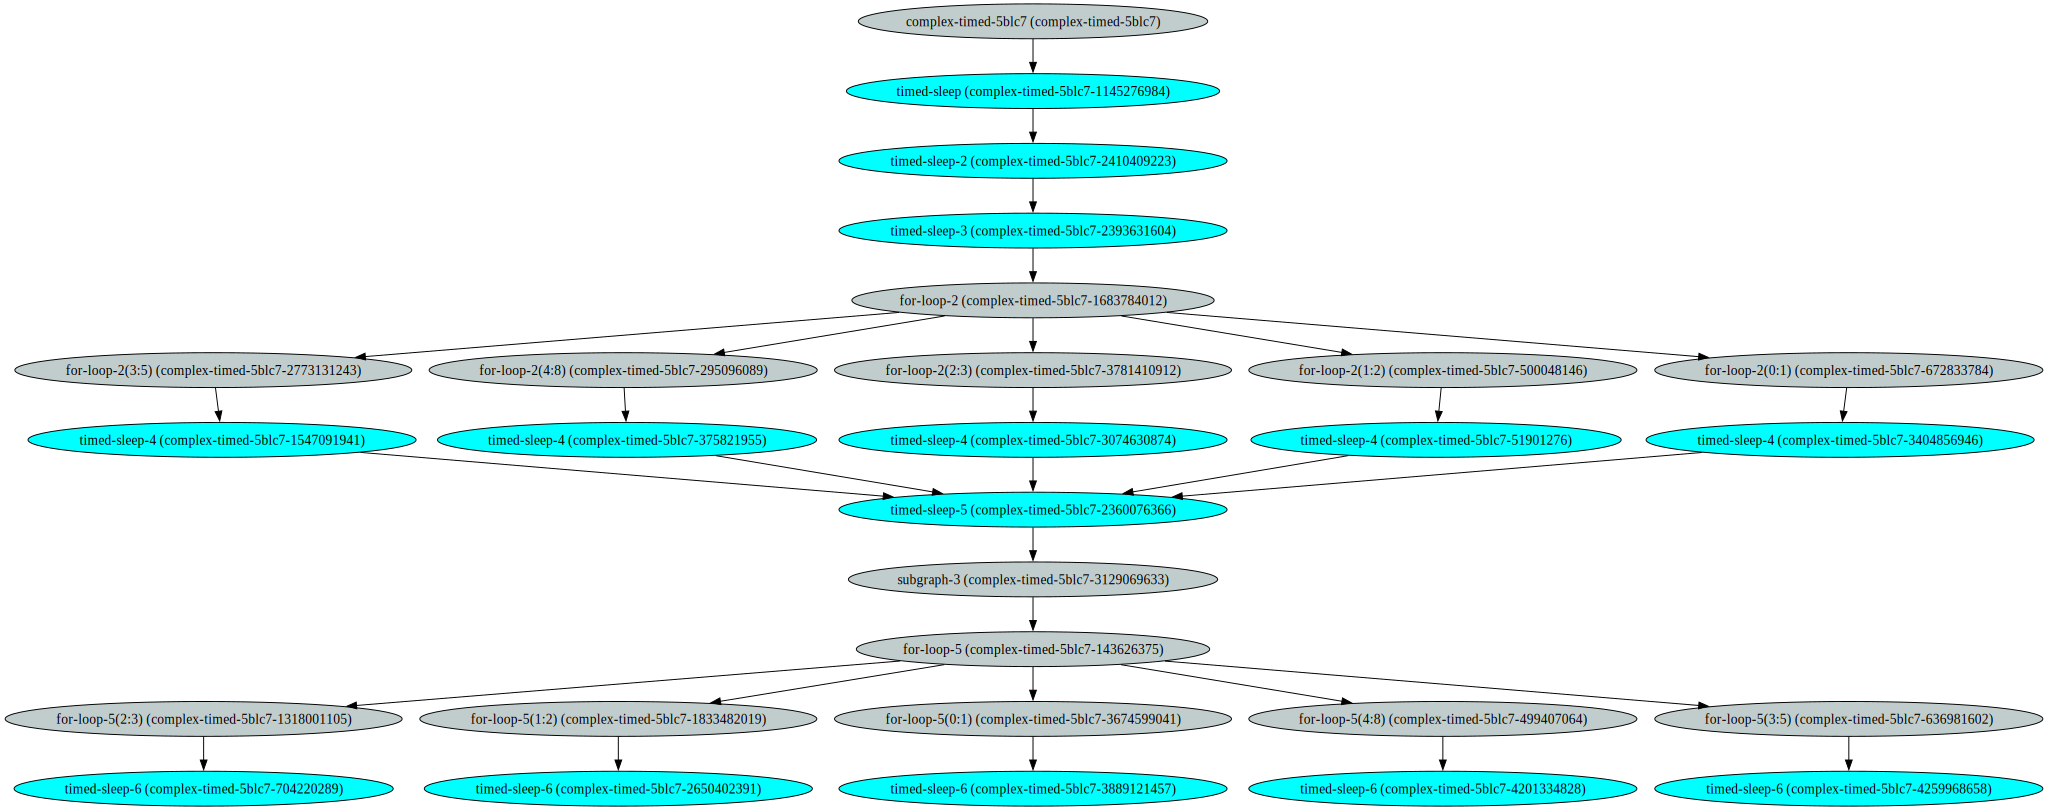

In [92]:
d.graph_viz()